In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [39]:
df = pd.read_csv("openpowerlifting.csv")

/var/folders/p1/7_hkttsj4778r4_my2lprjs00000gn/T/ipykernel_17843/2594218218.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("openpowerlifting.csv")


In [3]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

In [4]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [40]:
df = df[df["Sex"] == "M"]

In [6]:
john_haack = df.loc[df["Name"] == "John Haack"]

In [76]:
df["Name"] = df["Name"].str.replace("#1", "")

In [159]:
#Top 10 tested athletes
df_tested = df[df["Tested"] == "Yes"].sort_values(by="TotalKg", ascending=False).head(30)
df_dropped = df_tested.drop_duplicates(subset="Name", keep="first")
df_dropped = df_dropped.head(5)

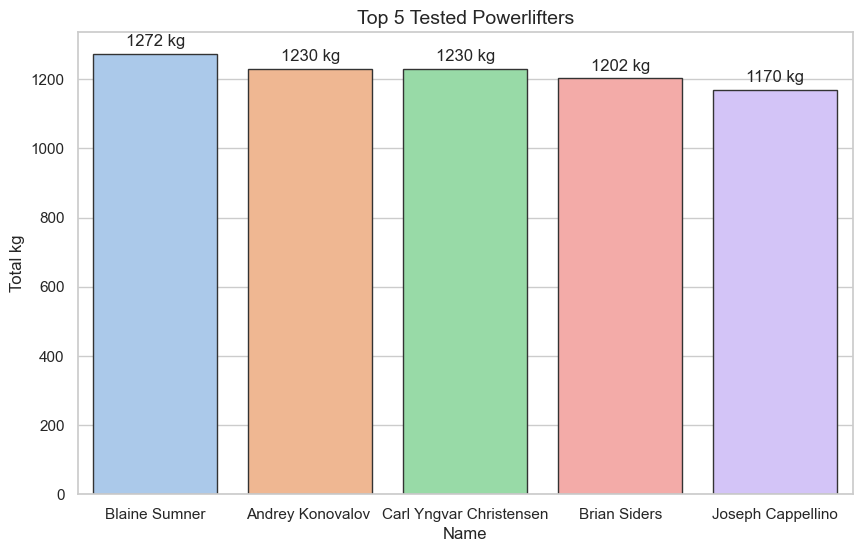

In [161]:
sns.set(style='whitegrid')

palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='Name', 
    y='TotalKg', 
    data=df_dropped, 
    palette=palette, 
    edgecolor=".2"
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())} kg',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', 
                      va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Name', fontsize=12)
plt.ylabel('Total KG Lifted', fontsize=12)
plt.title('Top 5 Tested Powerlifters', fontsize=14)

plt.show()



In [79]:
#Top not tested athletes (Assuming as since it all other values as NaN) //Mockup dataset
df_not_tested = df[df["Tested"] != "Yes"].sort_values(by="TotalKg", ascending=False).head(20)
df_not_tested = df_not_tested.drop_duplicates(subset="Name", keep="first")

In [80]:
df_not_tested

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
632421,Dave Hoff,M,SBD,Multi-ply,30.0,24-34,M_OEM_APF,133.20,140,-517.5,517.5,555.0,NaN,555.00,425.0,442.5,NaN,NaN,442.50,352.5,370.0,NaN,NaN,370.00,1367.50,1,770.20,770.20,731.37,845.64,NaN,USA,APF,2018-06-08,USA,IL,Equipped Nationals
172181,Donnie Thompson,M,SBD,Multi-ply,46.5,45-49,Pro Open,174.69,140+,NaN,NaN,NaN,NaN,573.79,NaN,NaN,NaN,NaN,430.91,NaN,NaN,NaN,NaN,356.07,1360.78,1,735.88,785.91,688.67,749.00,NaN,USA,SPF,2011-08-20,USA,OH,PowerStation Pro/Am
1382065,Jonas Rantanen,M,SBD,Multi-ply,27.0,24-34,NaN,140.00,140,NaN,NaN,NaN,NaN,575.00,NaN,NaN,NaN,NaN,390.00,NaN,NaN,NaN,NaN,375.00,1340.00,1,748.80,748.80,709.41,811.17,NaN,Finland,FPO,2011-10-08,Finland,NaN,Bullfarm Championships
174240,AJ Roberts,M,SBD,Multi-ply,26.5,24-34,Pro Open,137.71,140,NaN,NaN,NaN,NaN,546.58,NaN,NaN,NaN,NaN,396.89,NaN,NaN,NaN,NaN,351.53,1295.01,1,725.48,725.48,687.82,791.43,NaN,USA,SPF,2012-03-10,USA,NaN,Ironman Classic Pro/Am
923195,Yevgen Yarymbash,M,SBD,Multi-ply,29.0,24-34,Open,135.17,140,NaN,NaN,NaN,NaN,550.00,NaN,NaN,NaN,NaN,360.00,NaN,NaN,NaN,NaN,380.00,1290.00,1,724.80,724.80,687.77,795.23,NaN,Ukraine,XPC,2013-03-03,USA,OH,Elite/Pro Open


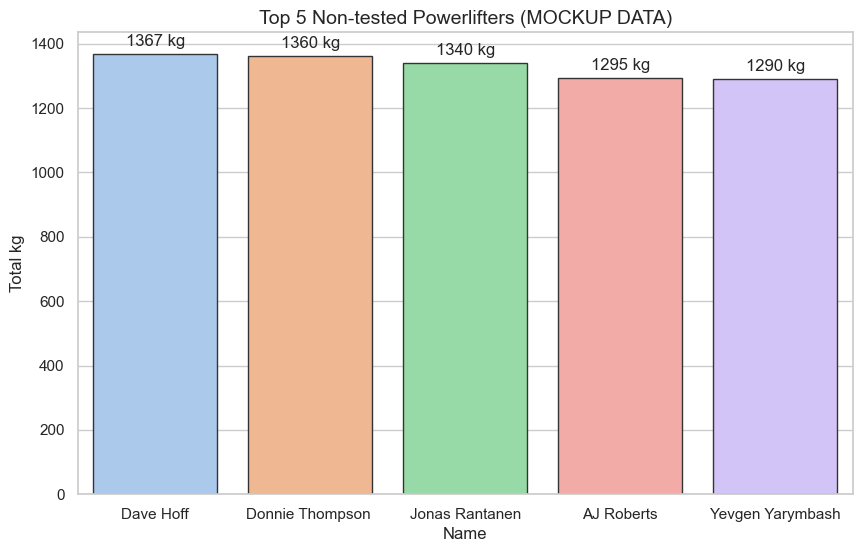

In [162]:
sns.set(style='whitegrid')

palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='Name', 
    y='TotalKg', 
    data=df_not_tested, 
    palette=palette, 
    edgecolor=".2"
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())} kg',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', 
                      va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Name', fontsize=12)
plt.ylabel('Total KG Lifted', fontsize=12)
plt.title('Top 5 Non-tested Powerlifters (MOCKUP DATA)', fontsize=14)

plt.show()

In [126]:
#Top Swedish Powerlifters 
df_sweden = df[df["Country"] == "Sweden"]
df_sweden = df_sweden.sort_values(by="TotalKg", ascending=False)
df_sweden.drop_duplicates(subset="Name", keep="first", inplace=True)
df_sweden = df_sweden.head(5)

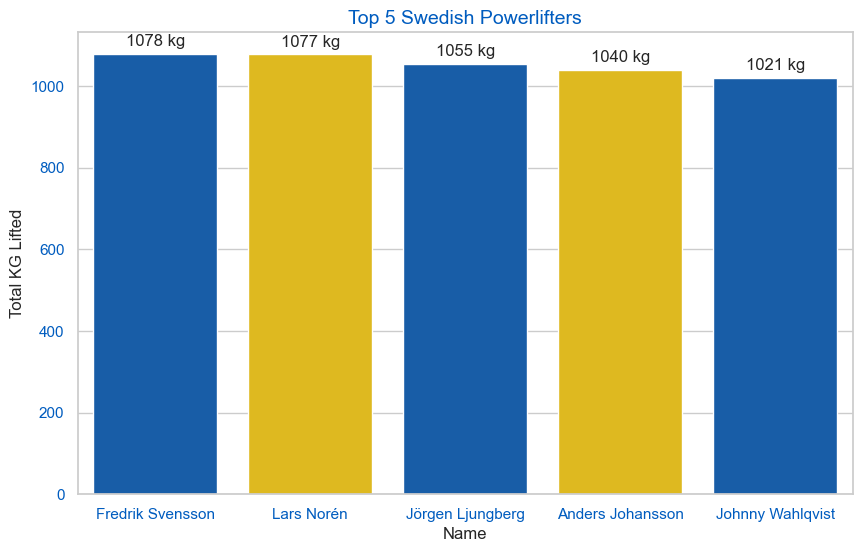

In [164]:
sns.set(style='whitegrid')

swedish_palette = ["#005cbf", "#fecc00"]  # Blue and Yellow

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='Name', 
    y='TotalKg', 
    data=df_sweden, 
    palette=swedish_palette
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())} kg',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', 
                      va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Name', fontsize=12)
plt.ylabel('Total KG Lifted', fontsize=12)
plt.title('Top 5 Swedish Powerlifters', fontsize=14, color="#005cbf") 


plt.xticks(color="#005cbf")  
plt.yticks(color="#005cbf")  


plt.show()

In [100]:
df_croatian = df[df["Country"] =="Croatia"]
df_croatian = df_croatian.sort_values(by="TotalKg", ascending=False)
df_croatian.drop_duplicates(subset="Name", keep="first", inplace=True)
df_croatian = df_croatian.head(5)
df_croatian

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
796640,Milan Treskavica,M,SBD,Wraps,26.0,24-34,MO,150.5,140+,340.0,360.0,370.0,NaN,370.0,220.0,230.0,240.0,NaN,240.0,320.0,340.0,-350.0,NaN,340.0,950.0,1,525.38,525.38,496.34,708.87,NaN,Croatia,WRPF-SRB,2019-04-13,Bosnia and Herzegovina,NaN,Prvi Balkan Open
648584,Luka Udiljak,M,SBD,Wraps,21.0,20-23,Juniors,133.6,140,297.5,315.0,-325.0,NaN,315.0,177.5,187.5,192.5,NaN,192.5,310.0,330.0,345.0,NaN,345.0,852.5,1,479.90,489.50,455.64,667.20,NaN,Croatia,WUAP,2018-10-15,Slovakia,NaN,World Championships
935353,Petar Klančir,M,SBD,Wraps,NaN,NaN,O,NaN,125+,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,280.0,820.0,1,NaN,NaN,NaN,NaN,NaN,Croatia,Croatia-UA,2010-12-19,Croatia,NaN,Team-Up Božićno natjecanje
935430,Antonio Podkubošek,M,SBD,Wraps,NaN,NaN,O,135.3,125+,300.0,310.0,-320.0,NaN,310.0,190.0,205.0,-210.0,NaN,205.0,280.0,300.0,-315.0,NaN,300.0,815.0,2,457.84,457.84,434.44,629.89,NaN,Croatia,Croatia-UA,2012-11-24,Croatia,NaN,Najjači Dalmatinac
1237541,Ante Gluić,M,SBD,Wraps,19.0,18-19,T3,122.7,125,300.0,310.0,315.0,NaN,315.0,180.0,185.0,NaN,NaN,185.0,300.0,307.5,-312.5,NaN,307.5,807.5,1,461.94,480.42,440.40,657.10,NaN,Croatia,GPC,2018-09-16,Hungary,NaN,World Championships


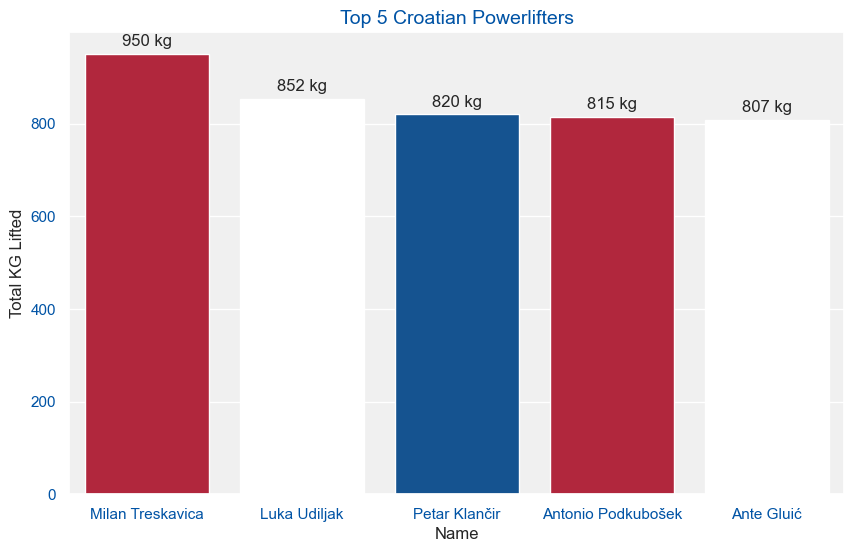

In [165]:
sns.set(style='darkgrid')

croatian_palette = ["#C8102E", "#FFFFFF", "#0053A5"]  # Red, White, and Blue

bg_color = "#F0F0F0"

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(bg_color)

bar_plot = sns.barplot(
    x='Name', 
    y='TotalKg', 
    data=df_croatian, 
    palette=croatian_palette
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())} kg',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', 
                      va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Name', fontsize=12)
plt.ylabel('Total KG Lifted', fontsize=12)
plt.title('Top 5 Croatian Powerlifters', fontsize=14, color="#0053A5") 

plt.xticks(color="#0053A5")  
plt.yticks(color="#0053A5")  

plt.show()

In [121]:
usa_df = df[df["Country"] == "USA"]
usa_df = usa_df.sort_values(by="TotalKg", ascending=False)
usa_df.drop_duplicates(subset="Name", keep="first", inplace=True)
usa_df = usa_df.head(5)
usa_df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
632421,Dave Hoff,M,SBD,Multi-ply,30.0,24-34,M_OEM_APF,133.20,140,-517.5,517.5,555.0,NaN,555.00,425.0,442.5,NaN,NaN,442.50,352.5,370.0,NaN,NaN,370.00,1367.50,1,770.20,770.20,731.37,845.64,NaN,USA,APF,2018-06-08,USA,IL,Equipped Nationals
172181,Donnie Thompson,M,SBD,Multi-ply,46.5,45-49,Pro Open,174.69,140+,NaN,NaN,NaN,NaN,573.79,NaN,NaN,NaN,NaN,430.91,NaN,NaN,NaN,NaN,356.07,1360.78,1,735.88,785.91,688.67,749.00,NaN,USA,SPF,2011-08-20,USA,OH,PowerStation Pro/Am
174240,AJ Roberts,M,SBD,Multi-ply,26.5,24-34,Pro Open,137.71,140,NaN,NaN,NaN,NaN,546.58,NaN,NaN,NaN,NaN,396.89,NaN,NaN,NaN,NaN,351.53,1295.01,1,725.48,725.48,687.82,791.43,NaN,USA,SPF,2012-03-10,USA,NaN,Ironman Classic Pro/Am
1377247,Blaine Sumner,M,SBD,Single-ply,29.5,24-34,Open,170.68,120+,475.0,505.0,-525.0,NaN,505.00,205.0,365.0,410.0,NaN,410.00,305.0,357.5,-375.0,NaN,357.50,1272.50,1,690.71,690.71,647.22,710.12,Yes,USA,NAPF,2017-03-04,USA,OH,Arnold Grand Prix
1240927,Jeff Lewis,M,SBD,Multi-ply,NaN,NaN,NaN,240.00,140+,NaN,NaN,NaN,NaN,550.00,NaN,NaN,NaN,NaN,370.00,NaN,NaN,NaN,NaN,350.00,1270.00,1,675.01,675.01,597.97,622.51,NaN,USA,WPC,2006-03-04,USA,OH,WPO Finals


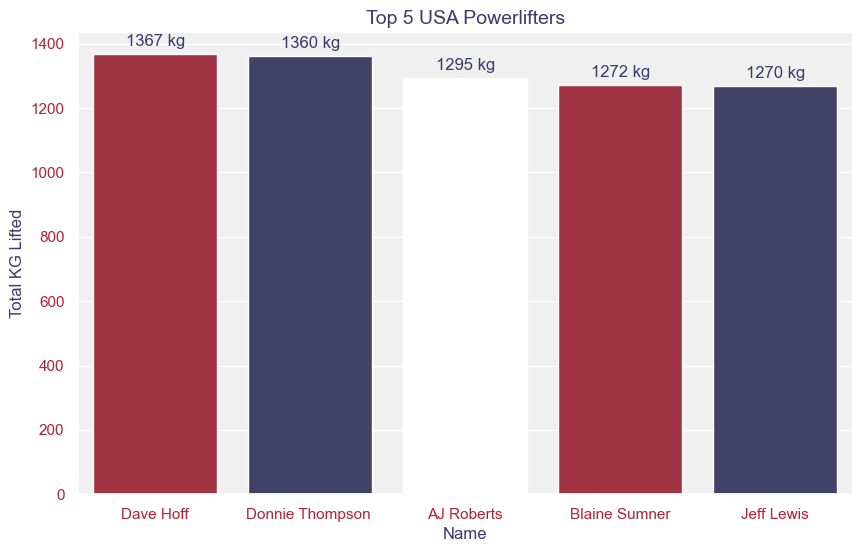

In [166]:
sns.set(style='darkgrid')

colors_usa = ['#B22234', '#3C3B6E', '#FFFFFF']  # Red, Blue, White

bg_color = "#F0F0F0"  # Light grey background

# Create the plot
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(bg_color)

bar_plot = sns.barplot(
    x='Name', 
    y='TotalKg', 
    data=usa_df, 
    palette=colors_usa  
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())} kg',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', 
                      va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points',
                      color=colors_usa[1])  

plt.xlabel('Name', fontsize=12, color=colors_usa[1])  
plt.ylabel('Total KG Lifted', fontsize=12, color=colors_usa[1])  
plt.title('Top 5 USA Powerlifters', fontsize=14, color=colors_usa[1])  

plt.xticks(color=colors_usa[0])  
plt.yticks(color=colors_usa[0])  

plt.show()

In [145]:
combined_df = pd.concat([usa_df, df_croatian, df_sweden])

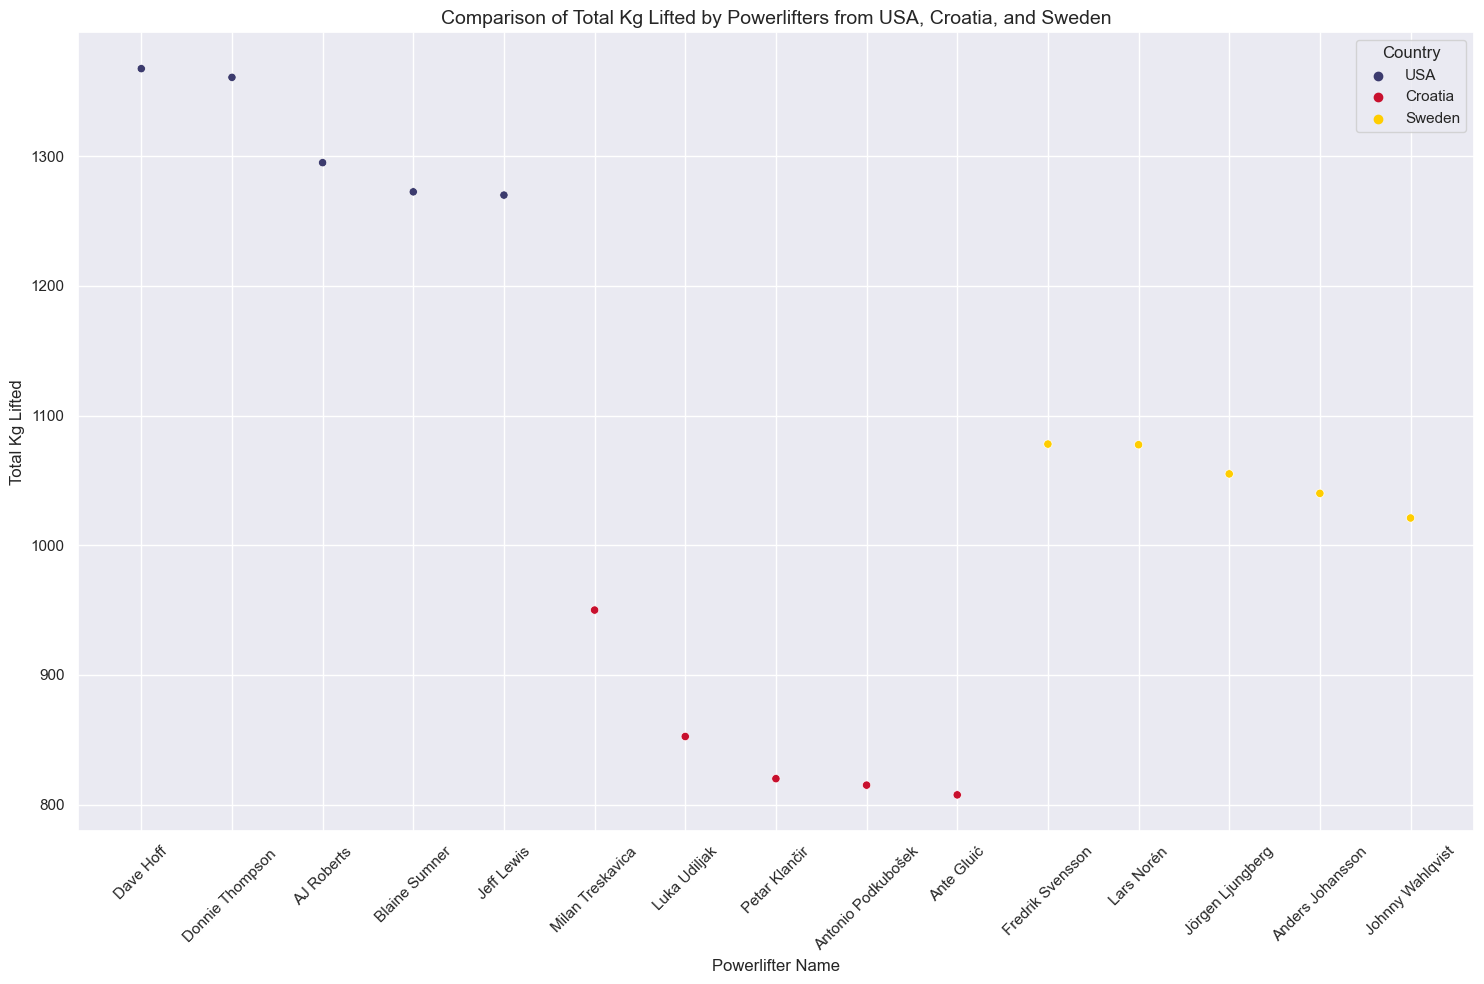

In [147]:
country_colors = {
    'USA': '#3C3B6E',  # blue
    'Croatia': '#C8102E',  # red
    'Sweden': '#FFCD00'  # yellow
}

# Create a scatter plot
plt.figure(figsize=(15, 10))
scatter_plot = sns.scatterplot(data=combined_df, x='Name', y='TotalKg', hue='Country', palette=country_colors)


plt.xticks(rotation=45)  
scatter_plot.set_xlabel('Powerlifter Name', fontsize=12)
scatter_plot.set_ylabel('Total Kg Lifted', fontsize=12)
scatter_plot.set_title('Comparison of Total Kg Lifted by Powerlifters from USA, Croatia, and Sweden', fontsize=14)
plt.legend(title='Country')
plt.tight_layout() 

# Show the plot
plt.show()

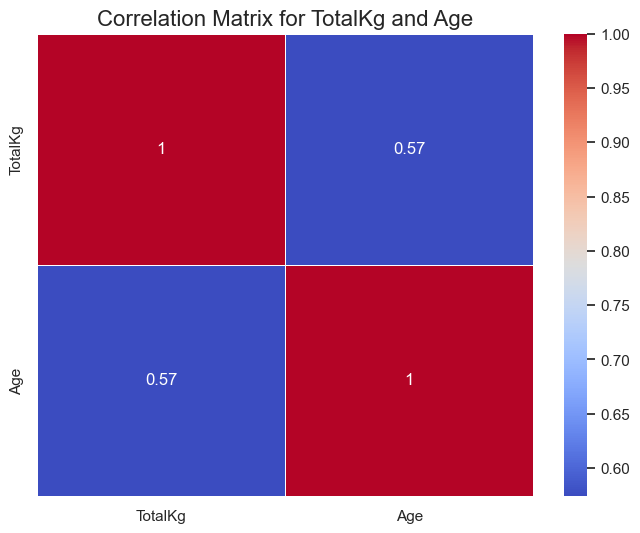

In [153]:
correlation_matrix = combined_df[['TotalKg', 'Age']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for TotalKg and Age', fontsize=16)

plt.show()

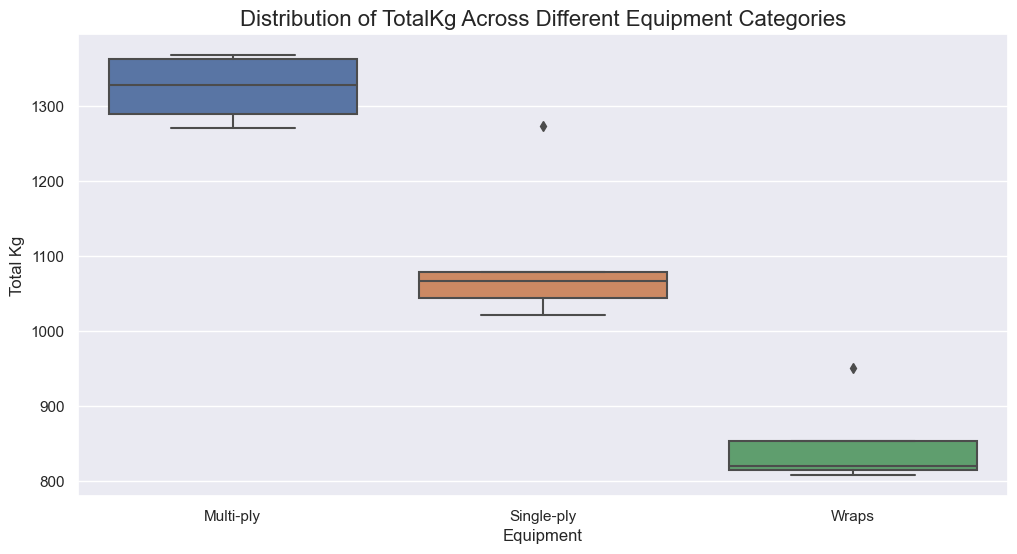

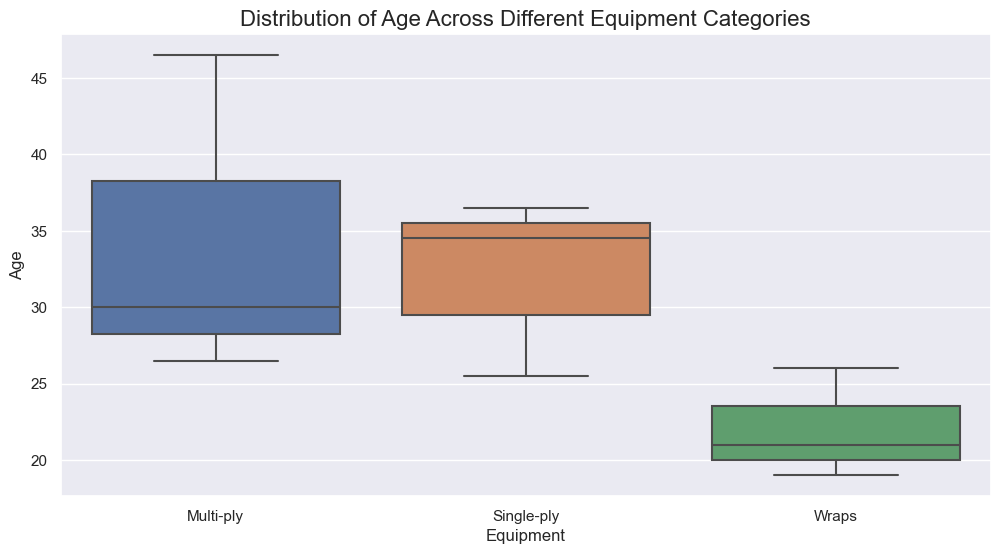

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Equipment', y='TotalKg', data=combined_df)
plt.title('Distribution of TotalKg Across Different Equipment Categories', fontsize=16)
plt.xlabel('Equipment', fontsize=12)
plt.ylabel('Total Kg', fontsize=12)
plt.show()

# Box plot for Age vs Equipment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Equipment', y='Age', data=combined_df)
plt.title('Distribution of Age Across Different Equipment Categories', fontsize=16)
plt.xlabel('Equipment', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()